<a href="https://colab.research.google.com/github/Darafarm/Darafarm/blob/main/ZINDI_AIRPORT_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [ ]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [ ]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;

In [ ]:
train.head()
train.STD.dtype

dtype('O')

In [ ]:
train['STD'] = pd.to_datetime(train['STD'])
train['DATOP'] = pd.to_datetime(train['DATOP'])
train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


In [ ]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [ ]:
test['STD'] = pd.to_datetime(test['STD'])
test['DATOP'] = pd.to_datetime(test['DATOP'])

In [ ]:
train['STD'].dt.minute.head()

0    30
1     5
2    10
3    10
4    30
Name: STD, dtype: int64

In [ ]:
train['STDminutes'] = train['STD'].dt.hour * 60 + train['STD'].dt.minute + train['STD'].dt.second/60;
test['STDminutes'] = test['STD'].dt.hour * 60 + test['STD'].dt.minute + test['STD'].dt.second/60
train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,STDminutes
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,630.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,905.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,250.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,850.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,870.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,980.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0,435.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,455.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0,460.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0,465.0


In [ ]:
train['STDyear']= train['STD'].dt.year
train['STDmonth']= train['STD'].dt.month
train['STDday']= train['STD'].dt.day

train['DATOPyear']= train['DATOP'].dt.year
train['DATOPmonth']= train['DATOP'].dt.month
train['DATOPday']= train['DATOP'].dt.day

test['STDyear']= test['STD'].dt.year
test['STDmonth']= test['STD'].dt.month
test['STDday']= test['STD'].dt.day

test['DATOPyear']= test['DATOP'].dt.year
test['DATOPmonth']= test['DATOP'].dt.month
test['DATOPday']= test['DATOP'].dt.day

In [ ]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,630.0,2016,1,3,2016,1,3
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,905.0,2016,1,13,2016,1,13
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,250.0,2016,1,16,2016,1,16
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,850.0,2016,1,17,2016,1,17
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,870.0,2016,1,17,2016,1,17


In [ ]:
test['STDyear']= test['STD'].dt.year
test['STDmonth']= test['STD'].dt.month
test['STDday']= test['STD'].dt.day

test['DATOPyear']= test['DATOP'].dt.year
test['DATOPmonth']= test['DATOP'].dt.month
test['DATOPday']= test['DATOP'].dt.day

In [ ]:
le = LabelEncoder()

In [ ]:
train['STDyear'] = le.fit_transform(train['STDyear']);
train['STDmonth'] = le.fit_transform(train['STDmonth']);
train['STDday'] = le.fit_transform(train['STDday'])

train['DATOPyear'] = le.fit_transform(train['DATOPyear']);
train['DATOPmonth'] = le.fit_transform(train['DATOPmonth']);
train['DATOPday'] = le.fit_transform(train['DATOPday'])

In [ ]:
#lent(train.columns)

In [ ]:
test['STDyear']= test['STD'].dt.year
test['STDmonth']= test['STD'].dt.month
test['STDday']= test['STD'].dt.day

test['DATOPyear']= test['DATOP'].dt.year
test['DATOPmonth']= test['DATOP'].dt.month
test['DATOPday']= test['DATOP'].dt.day

In [ ]:
test['STDyear'] = le.fit_transform(test['STDyear']);
test['STDmonth'] = le.fit_transform(test['STDmonth']);
test['STDday'] = le.fit_transform(test['STDday'])

test['DATOPyear'] = le.fit_transform(test['DATOPyear']);
test['DATOPmonth'] = le.fit_transform(test['DATOPmonth']);
test['DATOPday'] = le.fit_transform(test['DATOPday'])

In [ ]:
train['ID'] = le.fit_transform(train['ID']);
train['FLTID'] = le.fit_transform(train['FLTID']);

test['ID'] = le.fit_transform(test['ID']);
test['FLTID'] = le.fit_transform(test['FLTID']);

In [ ]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,2016-01-03,230,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,630.0,0,0,2,0,0,2
1,1,2016-01-13,257,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,905.0,0,0,12,0,0,12
2,18945,2016-01-16,86,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,250.0,0,0,15,0,0,15
3,30056,2016-01-17,164,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,850.0,0,0,16,0,0,16
4,41167,2016-01-17,136,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,870.0,0,0,16,0,0,16


In [ ]:

test = test.drop(columns = ['DATOP', 'STD'], axis = 1)

In [ ]:
train['STA'] = le.fit_transform(train['STA']);
test['STA'] = le.fit_transform(test['STA']);

In [ ]:
train['DEPSTN'] = le.fit_transform(train['DEPSTN']);
train['ARRSTN'] = le.fit_transform(train['ARRSTN']);
train['STATUS'] = le.fit_transform(train['STATUS']);
train['AC'] = le.fit_transform(train['AC']);

test['DEPSTN'] = le.fit_transform(test['DEPSTN']);
test['ARRSTN'] = le.fit_transform(test['ARRSTN']);
test['STATUS'] = le.fit_transform(test['STATUS']);
test['AC'] = le.fit_transform(test['AC']);

In [ ]:
plt.figure(figsize = (16,9))
viz = train.drop(['target'], axis = 1)
sns.barplot(viz,viz.corrwith(train['target']))


C:\Users\OLASOFT COMPUTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1152x648 with 0 Axes>

In [ ]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,2016-01-03,230,31,119,2016-01-03 10:30:00,173,0,46,260.0,630.0,0,0,2,0,0,2
1,1,2016-01-13,257,86,119,2016-01-13 15:05:00,849,0,28,20.0,905.0,0,0,12,0,0,12
2,18945,2016-01-16,86,123,58,2016-01-16 04:10:00,1005,0,46,0.0,250.0,0,0,15,0,0,15
3,30056,2016-01-17,164,37,91,2016-01-17 14:10:00,1122,0,50,0.0,850.0,0,0,16,0,0,16
4,41167,2016-01-17,136,123,4,2016-01-17 14:30:00,1115,0,34,22.0,870.0,0,0,16,0,0,16


<AxesSubplot:>

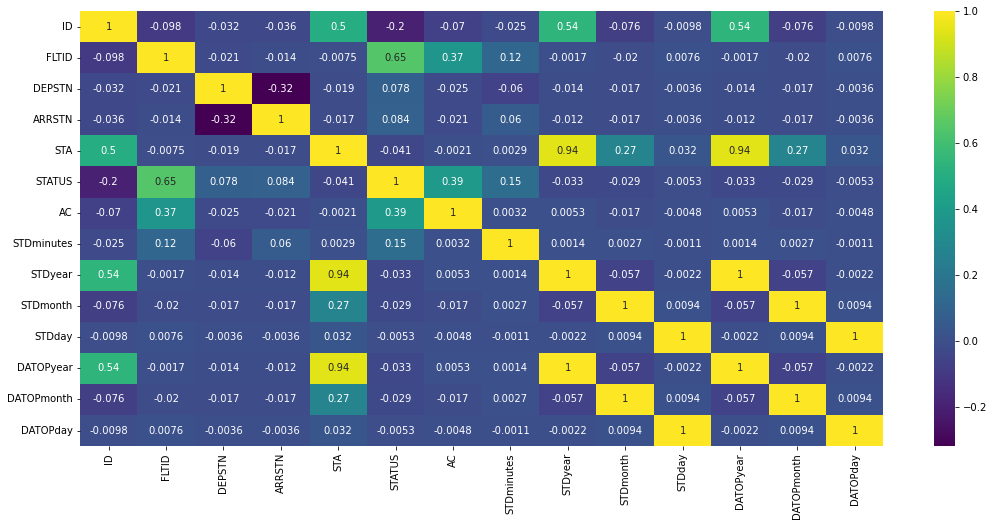

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(train.drop('target', axis = 1).corr(), annot = True, cmap = 'viridis')

In [ ]:

x = train.drop(columns  = ['DEPSTN', 'ARRSTN', 'STDmonth', 'STDday', 'DATOPmonth', 'DATOPday',  'target'], axis = 1);
y = train[['target']]

In [ ]:
#test = test.drop(columns  = ['DEPSTN', 'ARRSTN', 'STDmonth', 'STDday', 'DATOPmonth', 'DATOPday'], axis = 1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 51)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain, ytrain)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int32]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [ ]:
predict1 = lr.predict(xtest)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int32]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [ ]:
lr.score(xtest,ytest)

In [ ]:
xx = XGBRegressor();
xx.fit(xtrain, ytrain);
xx.score(xtest, ytest)
#predict2 = xx.predict(xtest)

In [ ]:
eval = pd.DataFrame(predict1) # 'XGBRegressor': predict2})

In [ ]:
ytest['Predicted values'] = predict1

In [ ]:
(ytest['target'] - ytest["Predicted values"])